In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/MyDrive/강의/m9_딥러닝

/content/drive/MyDrive/강의/m9_딥러닝


## IMDB 데이터셋

In [ ]:
# 인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 5만 개로 이루어진 데이터셋
# 훈련 데이터 2만 5,000개, 테스트 데이터 2만 5,000개 각각 50%는 부정, 50%는 긍정 리뷰로 구성
# IMDB 데이터셋 로드하기
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# 매개변수 `num_words=10000`은 훈련 데이터에서 가장 자주 나타나는 단어 10,000개만 사용하겠다는 의미

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# 변수 train_data와 test_data는 리뷰의 목록이다.
# 이 데이터는 전처리되어 있어 각 리뷰(단어 시퀀스)가 숫자 시퀀스로 변환되어 있다.
# 부정을 나타내는 0의 리스트
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
# 긍정을 나타내는 1의 리스트
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
## 리뷰 데이터 하나를 원래 영어 단어로 바꿔보자.
# word_index : 단어와 정수 인덱스를 매핑한 딕셔너리 생성
word_index = imdb.get_word_index()
# 정수인덱스와 단어를 매핑하도록 뒤집기
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩한다.
# 0,1,2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 데이터 준비

신경망에 숫자 리스트를 주입할 수는 없습니다. 리스트를 텐서로 바꾸는 두 가지 방법이 있습니다:

* 같은 길이가 되도록 리스트에 패딩을 추가하고 `(samples, sequence_length)` 크기의 정수 텐서로 변환합니다. 그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용합니다(`Embedding` 층을 말하며 나중에 자세히 다루겠습니다).
* 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환합니다. 예를 들면 시퀀스 `[3, 5]`를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환합니다. 그다음 부동 소수 벡터 데이터를 다룰 수 있는 `Dense` 층을 신경망의 첫 번째 층으로 사용합니다.

In [ ]:
# 리스트를 원-핫 인코딩하여 0,1의 벡터로 변환.
# 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  # 크기가 (len(sequences), dimension)이고, 모든 원소가 0인 행렬을 만든다.
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    results[i, sequence] =1. # result[i]에서 특정 인덱스의 위치를 1로 만든다.
  return results

# 훈련 데이터를 벡터로 변환한다.
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환한다.
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# 레이블을 벡터로 바꾼다.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 신경망 모델 만들기

입력 데이터가 벡터이고 레이블은 스칼라(1 또는 0)입니다. 이런 문제에 잘 작동하는 네트워크 종류는 `relu` 활성화 함수를 사용한 완전 연결 층(즉, `Dense(16, activation='relu')`)을 그냥 쌓은 것입니다.

`Dense` 층에 전달한 매개변수(16)는 은닉 유닛의 개수입니다. 하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 됩니다. 2장에서 `relu` 활성화 함수를 사용한 `Dense` 층을 다음과 같은 텐서 연산을 연결하여 구현하였습니다:

`output = relu(dot(W, input) + b)`

16개의 은닉 유닛이 있다는 것은 가중치 행렬 `W`의 크기가 `(input_dimension, 16)`이라는 뜻입니다. 입력 데이터와 `W`를 점곱하면 입력 데이터가 16 차원으로 표현된 공간으로 투영됩니다(그리고 편향 벡터 `b`를 더하고 `relu` 연산을 적용합니다). 표현 공간의 차원을 '신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도'로 이해할 수 있습니다. 은닉 유닛을 늘리면 (표현 공간을 더 고차원으로 만들면) 신경망이 더욱 복잡한 표현을 학습할 수 있지만 계산 비용이 커지고 원치 않은 패턴을 학습할 수도 있습니다(훈련 데이터에서는 성능이 향상되지만 테스트 데이터에서는 그렇지 않은 패턴입니다).

`Dense` 층을 쌓을 때 두 가진 중요한 구조상의 결정이 필요합니다:

* 얼마나 많은 층을 사용할 것인가
* 각 층에 얼마나 많은 은닉 유닛을 둘 것인가

* 16개의 은닉 유닛을 가진 두 개의 은닉층
* 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층

중간에 있는 은닉층은 활성화 함수로 `relu`를 사용하고 마지막 층은 확률(0과 1 사이의 점수로, 어떤 샘플이 타깃 '1'일 가능성이 높다는 것은 그 리뷰가 긍정일 가능성이 높다는 것을 의미합니다)을 출력하기 위해 시그모이드 활성화 함수를 사용합니다. `relu`는 음수를 0으로 만드는 함수입니다. 시그모이드는 임의의 값을 [0, 1] 사이로 압축하므로 출력 값을 확률처럼 해석할 수 있습니다.

다음이 이 신경망의 모습입니다:

![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

In [ ]:
## 이 신경망의 케라스 구현
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

마지막으로 손실 함수와 옵티마이저를 선택해야 합니다. 이진 분류 문제이고 신경망의 출력이 확률이기 때문에(네트워크의 끝에 시그모이드 활성화 함수를 사용한 하나의 유닛으로 된 층을 놓았습니다), `binary_crossentropy` 손실이 적합합니다. 이 함수가 유일한 선택은 아니고 예를 들어 `mean_squared_error`를 사용할 수도 있습니다. 확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택입니다. 크로스엔트로피는 정보 이론 분야에서 온 개념으로 확률 분포 간의 차이를 측정합니다. 여기에서는 원본 분포와 예측 분포 사이를 측정합니다.

다음은 `rmsprop` 옵티마이저와 `binary_crossentropy` 손실 함수로 모델을 설정하는 단계입니다. 훈련하는 동안 정확도를 사용해 모니터링하겠습니다.

In [ ]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop', # rmsprop 옵티마이저
              loss='binary_crossentropy', # binary_crossentropy 손실 함수
              metrics=['accuracy']) # 측정 지표

케라스에 `rmsprop`, `binary_crossentropy`, `accuracy`가 포함되어 있기 때문에 옵티마이저, 손실 함수, 측정 지표를 문자열로 지정하는 것이 가능합니다. 이따금 옵티마이저의 매개변수를 바꾸거나 자신만의 손실 함수, 측정 함수를 전달해야 할 경우가 있습니다. 전자의 경우에는 옵티마이저 파이썬 클래스를 사용해 객체를 직접 만들어 `optimizer` 매개변수에 전달하면 됩니다:

In [ ]:
# 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), # lr : Learning rate 학습률. 작을수록 자세하게 학습
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


후자의 경우는 `loss`와 `metrics` 매개변수에 함수 객체를 전달하면 됩니다:

In [ ]:
# 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 훈련 검증

In [ ]:
# 훈련 데이터에서 10,000의 샘플을 떼어 검증 세트 준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
len(partial_x_train)

15000

이제 모델을 512개 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킵니다(`x_train`과 `y_train` 텐서에 있는 모든 샘플에 대해 20번 반복합니다).  
동시에 따로 떼어 놓은 10,000개의 샘플에서 손실과 정확도를 측정할 것입니다. 이렇게 하려면 `validation_data` 매개변수에 검증 데이터를 전달해야 합니다.

In [ ]:
# 모델 훈련하기
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data =(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 36ms/step - loss: 0.5029 - acc: 0.7824 - val_loss: 0.3692 - val_acc: 0.8760
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2930 - acc: 0.9027 - val_loss: 0.2999 - val_acc: 0.8871
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2122 - acc: 0.9298 - val_loss: 0.2847 - val_acc: 0.8875
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1689 - acc: 0.9413 - val_loss: 0.2798 - val_acc: 0.8890
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1331 - acc: 0.9576 - val_loss: 0.2847 - val_acc: 0.8850
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1095 - acc: 0.9669 - val_loss: 0.3018 - val_acc: 0.8828
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0904 - acc: 0.9735 - val_loss: 0.3310 - val_acc: 0.8775
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0737 - a

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

이 딕셔너리는 훈련과 검증하는 동안 모니터링할 측정 지표당 하나씩 모두 네 개의 항목을 담고 있습니다. 

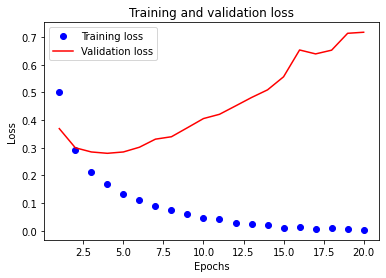

In [ ]:
# 훈련과 검증 데이터에 대한 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

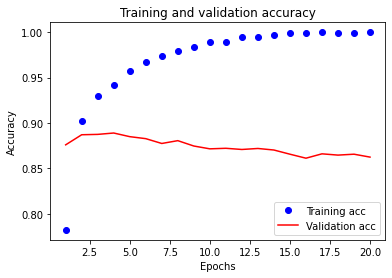

In [ ]:
# 훈련과 검증 데이터에 대한 정확도 그리기
plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

점선은 훈련 손실과 정확도이고 실선은 검증 손실과 정확도입니다. 신경망의 무작위한 초기화 때문에 사람마다 결과거 조금 다를 수 있습니다.

여기에서 볼 수 있듯이 훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가합니다. 경사 하강법 최적화를 사용했을 때 반복마다 최소화되는 것이 손실이므로 기대했던 대로입니다. 검증 손실과 정확도는 이와 같지 않습니다. 4번째 에포크에서 그래프가 역전되는 것 같습니다. 이것이 훈련 세트에서 잘 작동하는 모델이 처음 보는 데이터에 잘 작동하지 않을 수 있다고 앞서 언급한 경고의 한 사례입니다. 정확한 용어로 말하면 과대적합되었다고 합니다. 2번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화되지 못합니다.

이런 경우에 과대적합을 방지하기 위해서 3번째 에포크 이후에 훈련을 중지할 수 있습니다. 일반적으로 4장에서 보게 될 과대적합을 완화하는 다양한 종류의 기술을 사용할 수 있습니다.

처음부터 다시 새로운 신경망을 4번의 에포크 동안만 훈련하고 테스트 데이터에서 평가해 보겠습니다:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=152)
results = model.evaluate(x_test, y_test)

Epoch 1/4
165/165 [==============================] - 1s 4ms/step - loss: 0.3691 - accuracy: 0.8583
Epoch 2/4
165/165 [==============================] - 1s 4ms/step - loss: 0.2128 - accuracy: 0.9198
Epoch 3/4
165/165 [==============================] - 1s 4ms/step - loss: 0.1730 - accuracy: 0.9373
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3415 - accuracy: 0.8732


In [ ]:
results

[0.34145766496658325, 0.873199999332428]

아주 단순한 방식으로도 87%의 정확도를 달성했습니다. 최고 수준의 기법을 사용하면 95%에 가까운 성능을 얻을 수 있습니다.

## 훈련된 모델로 새로운 데이터에 대해 예측하기

모델을 훈련시킨 후에 이를 실전 환경에서 사용하고 싶을 것입니다. `predict` 메서드를 사용해서 어떤 리뷰가 긍정일 확률을 예측할 수 있습니다:

In [ ]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.06935684],
       [0.9998423 ],
       [0.7758539 ],
       ...,
       [0.09750584],
       [0.02429081],
       [0.51258594]], dtype=float32)

여기에서처럼 이 모델은 어떤 샘플에 대해 확신을 가지고 있지만(0.99 또는 그 이상, 0.01 또는 그 이하) 어떤 샘플에 대해서는 확신이 부족합니다(0.6, 0.4). 